In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from scipy import stats
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
df.shape

(2938, 22)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [19]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Data Preprocessing

In [22]:
#We will first drop the country column as it cannot be used in our Regression model.
df = df.drop(['Country'], axis=1)
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

In [24]:
df[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())


In [25]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [27]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [45]:
df.columns = df.columns.str.strip()

In [50]:
df['Life expectancy'].describe()

count    2938.000000
mean       69.224932
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: Life expectancy, dtype: float64

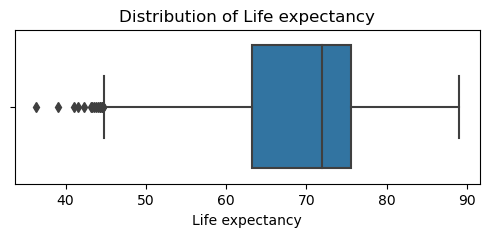

In [46]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Life expectancy'])
plt.title('Distribution of Life expectancy')
plt.show()

The average life expectancy is around 70 years.

The maximun life expectancy is 89 years.

There are some outliers where life expectancy is below 40 years.

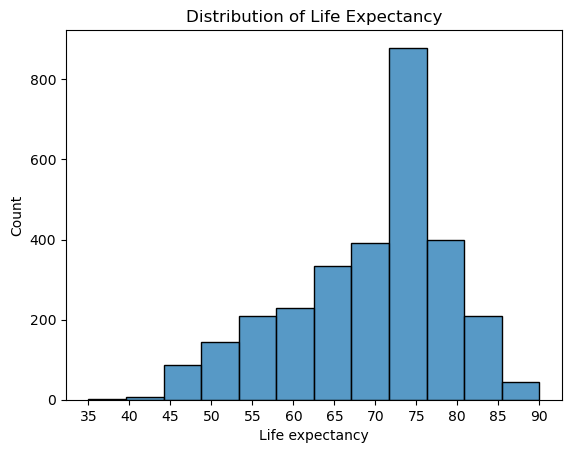

In [49]:
sns.histplot(df['Life expectancy'], binrange=(35,90), bins=12)
plt.title('Distribution of Life Expectancy')
plt.xticks(list(range(35,95,5)))
plt.show()

In [52]:
df['Adult Mortality'].describe()

count    2938.000000
mean      164.796448
std       124.080302
min         1.000000
25%        74.000000
50%       144.000000
75%       227.000000
max       723.000000
Name: Adult Mortality, dtype: float64

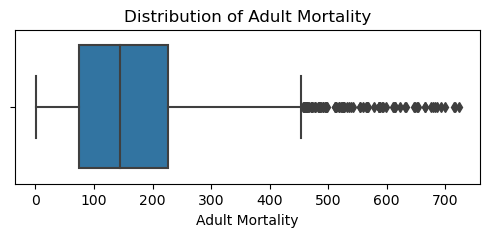

In [53]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Adult Mortality'])
plt.title('Distribution of Adult Mortality')
plt.show()

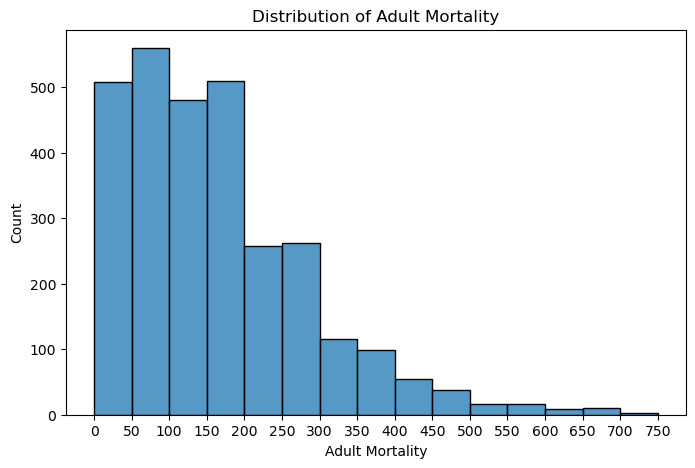

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(df['Adult Mortality'], binrange=(0,750), bins=15)
plt.title('Distribution of Adult Mortality')
plt.xticks(list(range(0,800,50)))
plt.show()

In [55]:
df['Income composition of resources'].describe()

count    2938.000000
mean        0.627551
std         0.204820
min         0.000000
25%         0.504250
50%         0.662000
75%         0.772000
max         0.948000
Name: Income composition of resources, dtype: float64

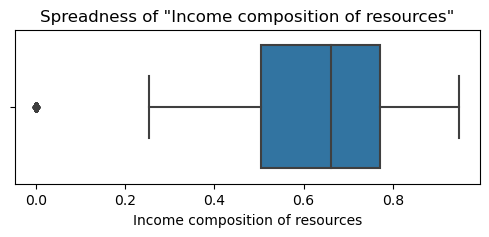

In [56]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Income composition of resources'])
plt.title('Spreadness of "Income composition of resources"')
plt.show()

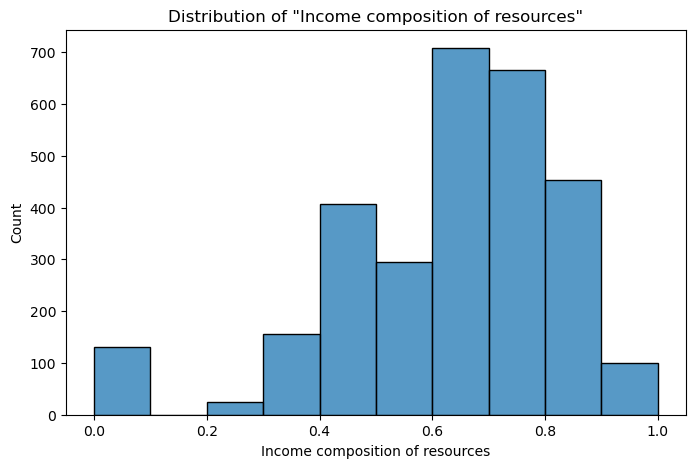

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income composition of resources'], binrange=(0,1), bins=10)
plt.title('Distribution of "Income composition of resources"')
plt.show()

In [58]:
df['Schooling'].describe()

count    2938.000000
mean       11.992793
std         3.264381
min         0.000000
25%        10.300000
50%        12.100000
75%        14.100000
max        20.700000
Name: Schooling, dtype: float64

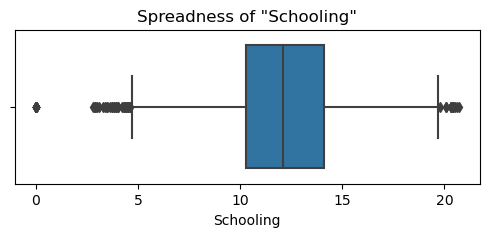

In [59]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Schooling'])
plt.title('Spreadness of "Schooling"')
plt.show()

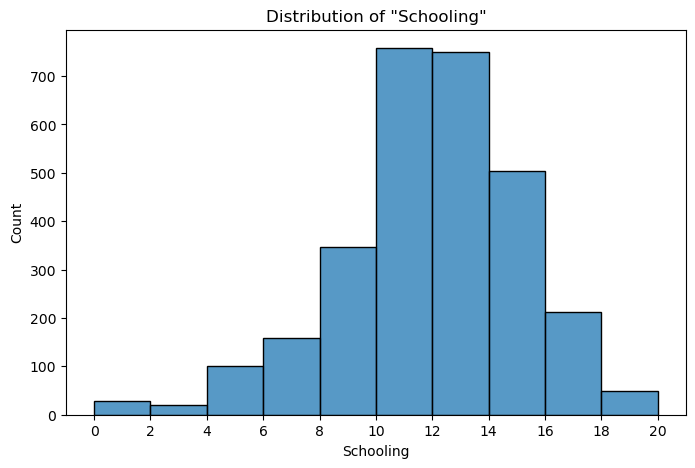

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['Schooling'], binrange=(0,20), bins=10)
plt.title('Distribution of "Schooling"')
plt.xticks(list(range(0,22,2)))
plt.show()


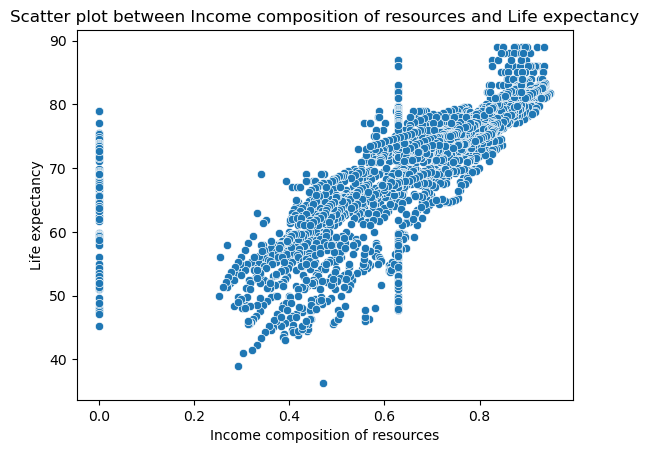

In [61]:
sns.scatterplot(x=df['Income composition of resources'], y=df['Life expectancy'])
plt.title('Scatter plot between Income composition of resources and Life expectancy')
plt.show()

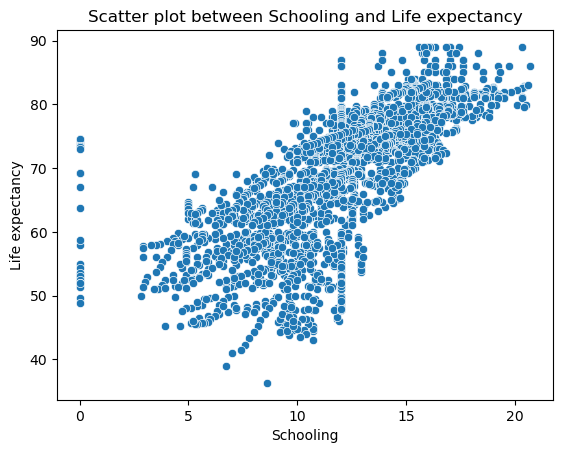

In [62]:
sns.scatterplot(x=df['Schooling'], y=df['Life expectancy'])
plt.title('Scatter plot between Schooling and Life expectancy')
plt.show()

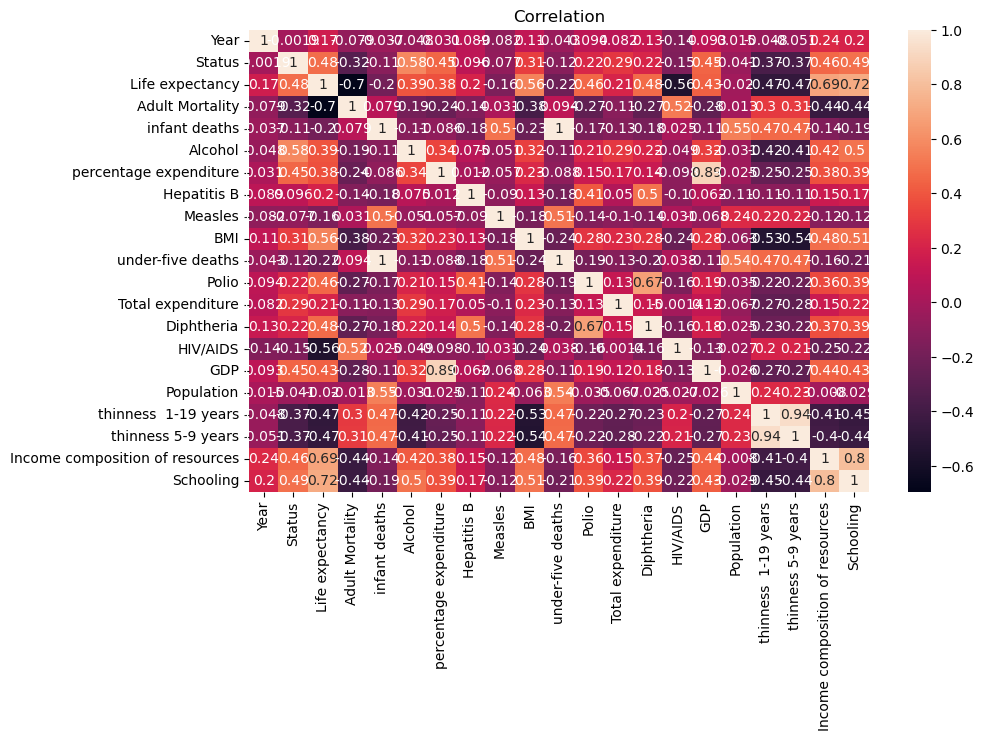

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation')
plt.show()

<Axes: xlabel='Year', ylabel='count'>

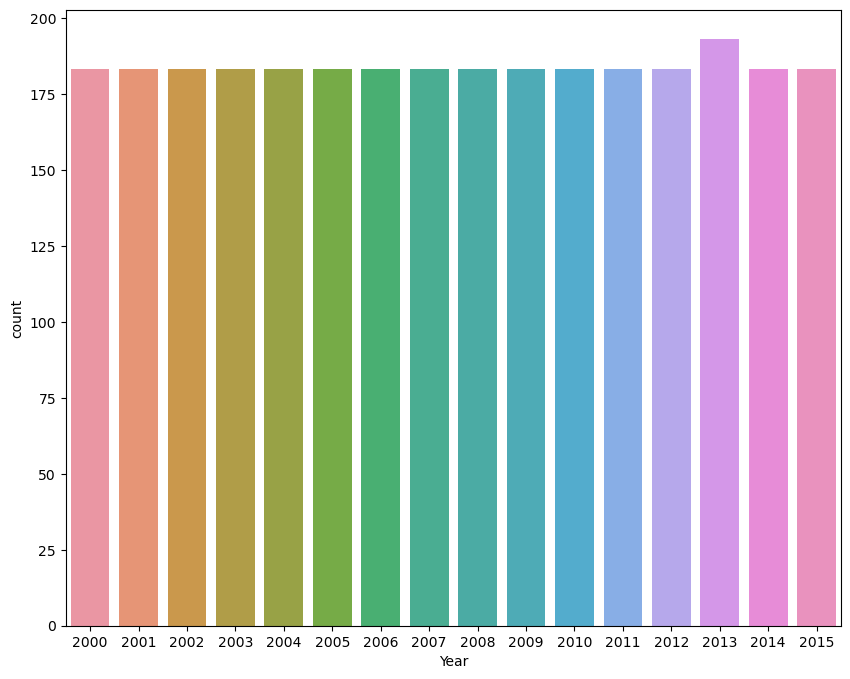

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Year')

We can make an see here that maximum of the data of the countries is for 2013.

<Axes: xlabel='Status', ylabel='count'>

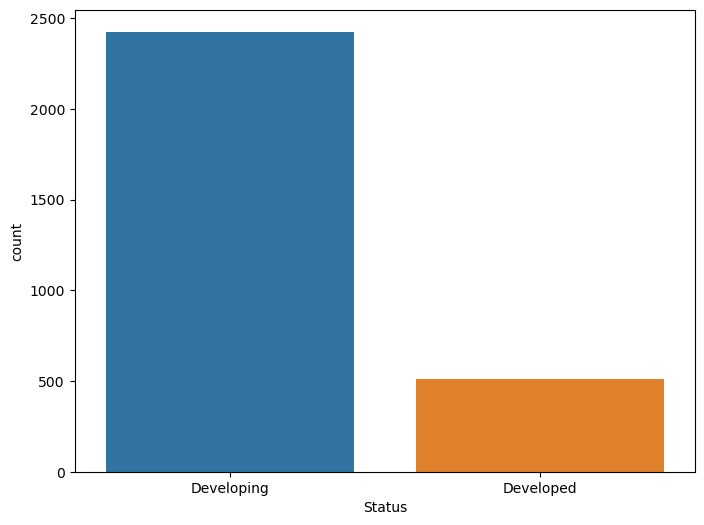

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status')

This data has mostly developing countries than developed.

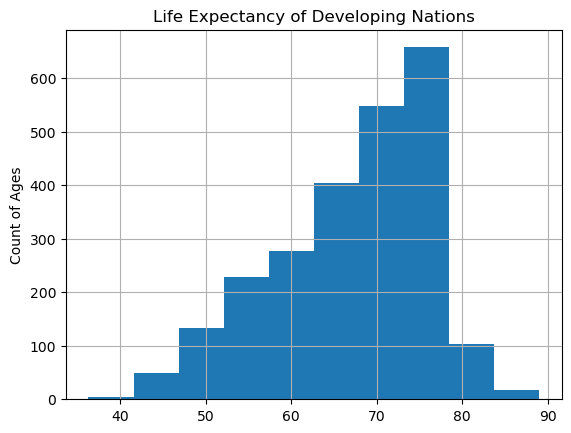

In [32]:
developing_df = df[df['Status'] == 'Developing']
developing_df['Life expectancy '].hist()
plt.xlabel('')
plt.ylabel('Count of Ages')
plt.title("Life Expectancy of Developing Nations")
plt.show()


We can see  that range of years for life expectancy lies between 42 - 90 years.


<Axes: >

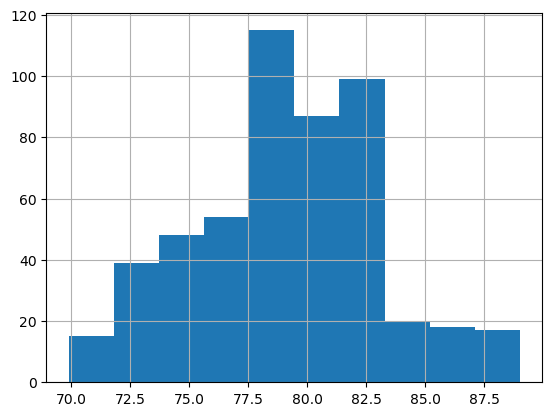

In [33]:
developed_df = df[df['Status'] == 'Developed']
developed_df['Life expectancy '].hist()


Whereas in developed nations, the range of age is between 70 to 90.

In [34]:
status_dict = {'Developing': 0,'Developed': 1}

df.Status = [status_dict[item] for item in df.Status]
df['Status'].value_counts()

Status
0    2426
1     512
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop(['Life expectancy '],axis=1)
y = df['Life expectancy ']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression().fit(X, y)

In [40]:
reg.score(X, y)

0.8197540250330588

In [41]:
y_predicted = reg.predict(X_test)

<Axes: ylabel='Life expectancy '>

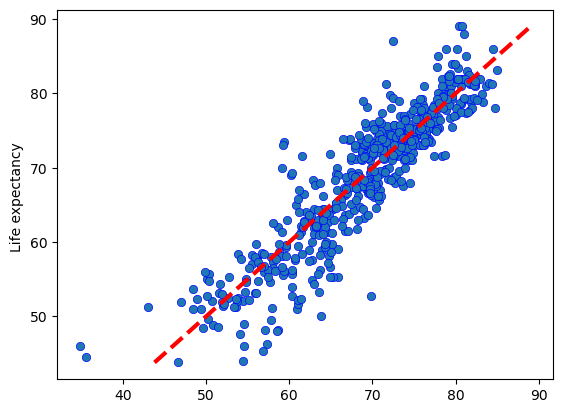

In [42]:
sns.scatterplot(x=y_predicted, y=y_test, edgecolor=(0, 0, 1))
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--', lw=3)

In [43]:
from sklearn import metrics

In [44]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 2.8357761248899855
MSE is 14.926458970723418
R2 score is 0.8277092253462137
